In [40]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(2412, 2)

In [42]:
df.head()

,Time,domain
0,2022-01-28 14:22:51,www.google.com
1,2022-01-28 14:23:01,www.google.com
2,2022-01-28 14:23:02,www.google.com
3,2022-01-28 14:23:21,www.microsoft.com
4,2022-01-28 14:24:01,www.google.com


In [43]:
df.tail()

,Time,domain
2407,2022-04-14 16:35:50,localhost:8888
2408,2022-04-14 16:59:39,www.google.com
2409,2022-04-14 16:59:45,www.spellchecker.net
2410,2022-04-14 17:03:43,blackboard.umbc.edu
2411,2022-04-14 17:04:48,www.linkedin.com


In [44]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [45]:
df.dropna( inplace=True)

In [46]:
df.dtypes

Time      object
domain    object
dtype: object

In [47]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [48]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [49]:
df['Time'] = pd.to_datetime(df['Time'])

In [50]:
# df['domain'] = df['domain'].astype(str)

In [51]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [52]:
df.head()

,Time,domain
0,2022-01-28 14:22:51,www.google.com
1,2022-01-28 14:23:01,www.google.com
2,2022-01-28 14:23:02,www.google.com
3,2022-01-28 14:23:21,www.microsoft.com
4,2022-01-28 14:24:01,www.google.com


In [53]:
df['domain'].value_counts()[:50]

www.google.com                       415
github.com                           408
localhost:8888                       359
webauth.umbc.edu                     302
www.paraphrase-online.com            145
my.umbc.edu                          123
blackboard.umbc.edu                  115
umbc-my.sharepoint.com                88
www.office.com                        59
localhost:8890                        50
localhost:8889                        38
mail.google.com                       22
www.geeksforgeeks.org                 17
stackoverflow.com                     15
www.youtube.com                       11
accounts.google.com                   10
login.microsoftonline.com              9
quillbot.com                           8
www.chegg.com                          8
www.bbc.com                            8
pandas.pydata.org                      7
www.calculatorsoup.com                 7
raw.githubusercontent.com              6
www.codegrepper.com                    6
outlook.office.c

<AxesSubplot:>

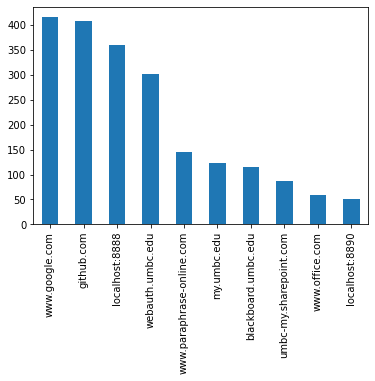

In [54]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [55]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     116
1      79
2      23
3      16
7      17
8      34
9      86
10     73
11     94
12    133
13    114
14    242
15    336
16    182
17    125
18    128
19    113
20    146
21    170
22     63
23    122
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

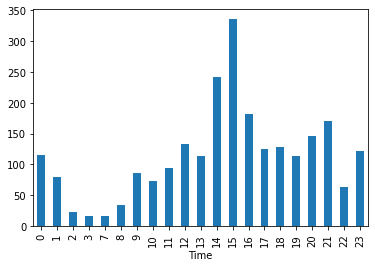

In [56]:
hourly_counts.plot.bar()

In [57]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-28 14:22:51,www.google.com,Friday,4
1,2022-01-28 14:23:01,www.google.com,Friday,4
2,2022-01-28 14:23:02,www.google.com,Friday,4
3,2022-01-28 14:23:21,www.microsoft.com,Friday,4
4,2022-01-28 14:24:01,www.google.com,Friday,4


In [58]:
df['Day'].value_counts()

Sunday       637
Tuesday      420
Saturday     346
Thursday     337
Monday       278
Wednesday    205
Friday       189
Name: Day, dtype: int64

In [59]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    278
1    420
2    205
3    337
4    189
5    346
6    637
Name: DayIndex, dtype: int64

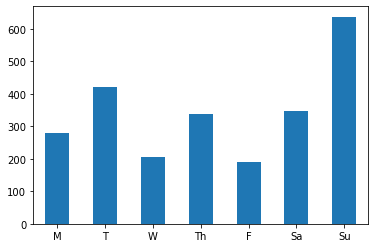

In [60]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [61]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-28 14:22:51,www.google.com,Friday,4,False
1,2022-01-28 14:23:01,www.google.com,Friday,4,False
2,2022-01-28 14:23:02,www.google.com,Friday,4,False
3,2022-01-28 14:23:21,www.microsoft.com,Friday,4,False
4,2022-01-28 14:24:01,www.google.com,Friday,4,False


In [62]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [63]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
38,2022-01-30 19:23:04,umbc-my.sharepoint.com,Sunday,6,True
98,2022-02-05 12:47:42,www.office.com,Saturday,5,True
99,2022-02-05 12:47:44,umbc-my.sharepoint.com,Saturday,5,True
100,2022-02-05 13:04:23,localhost:8888,Saturday,5,True
101,2022-02-05 13:15:47,www.google.com,Saturday,5,True


In [64]:
weekday['domain'].value_counts()[:5]

www.google.com      284
localhost:8888      240
webauth.umbc.edu    182
github.com          170
my.umbc.edu          81
Name: domain, dtype: int64

In [65]:
weekend['domain'].value_counts()[:5]

github.com                   238
www.google.com               131
webauth.umbc.edu             120
localhost:8888               119
www.paraphrase-online.com    100
Name: domain, dtype: int64

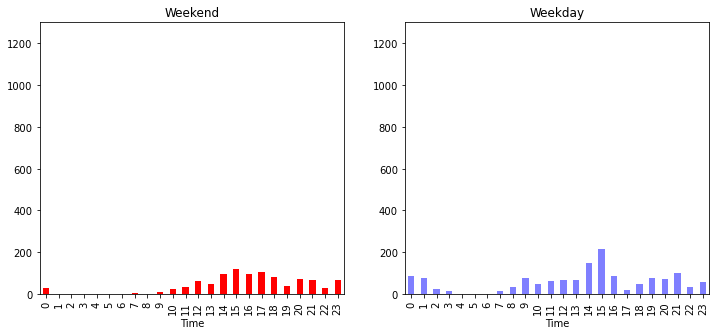

In [66]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [67]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

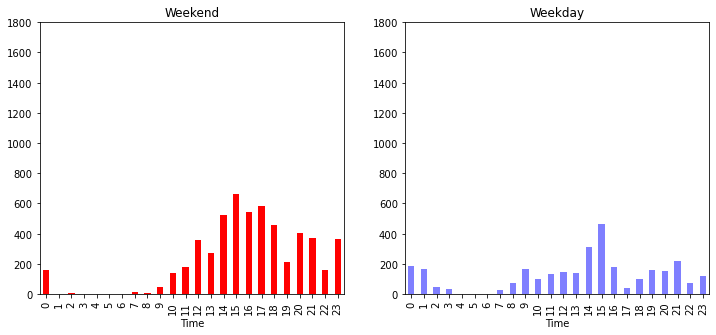

In [68]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [69]:
df['domain'].value_counts()[:50]

www.google.com                       415
github.com                           408
localhost:8888                       359
webauth.umbc.edu                     302
www.paraphrase-online.com            145
my.umbc.edu                          123
blackboard.umbc.edu                  115
umbc-my.sharepoint.com                88
www.office.com                        59
localhost:8890                        50
localhost:8889                        38
mail.google.com                       22
www.geeksforgeeks.org                 17
stackoverflow.com                     15
www.youtube.com                       11
accounts.google.com                   10
login.microsoftonline.com              9
quillbot.com                           8
www.chegg.com                          8
www.bbc.com                            8
pandas.pydata.org                      7
www.calculatorsoup.com                 7
raw.githubusercontent.com              6
www.codegrepper.com                    6
outlook.office.c

In [70]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

get_data_for_domain('github')

,Time,domain,Day,DayIndex,isWeekend
140,2022-02-06 14:13:31,github.com,Sunday,6,True
141,2022-02-06 14:13:58,github.com,Sunday,6,True
142,2022-02-06 14:14:06,github.com,Sunday,6,True
147,2022-02-06 14:18:14,github.com,Sunday,6,True
148,2022-02-06 14:18:23,github.com,Sunday,6,True
...,...,...,...,...,...
2300,2022-04-11 02:09:05,github.com,Monday,0,False
2340,2022-04-12 23:04:12,github.com,Tuesday,1,False
2344,2022-04-12 23:12:36,github.com,Tuesday,1,False
2367,2022-04-13 00:01:10,github.com,Wednesday,2,False


In [71]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

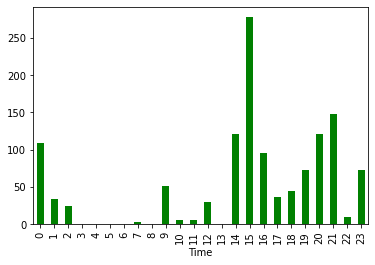

In [72]:
_= show_domain_stats('github', 'green')

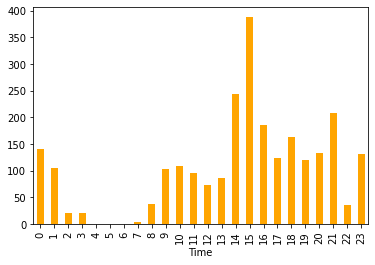

In [73]:
_= show_domain_stats('github|google|umbc', 'orange')

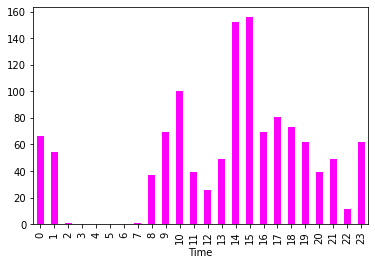

In [74]:
_ = show_domain_stats('umbc', 'magenta')


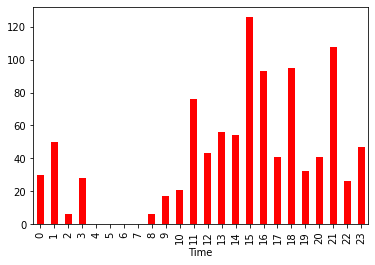

In [75]:
_ = show_domain_stats('google', 'red')

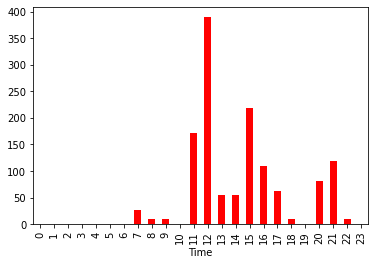

In [76]:
_ = show_domain_stats('paraphrase', 'red')

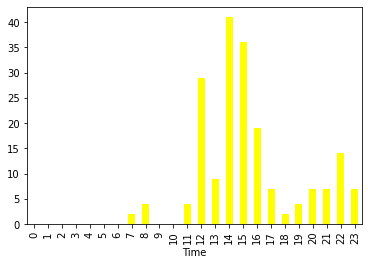

In [77]:
_ = show_domain_stats('youtube|office|calculatorsoup', 'yellow')

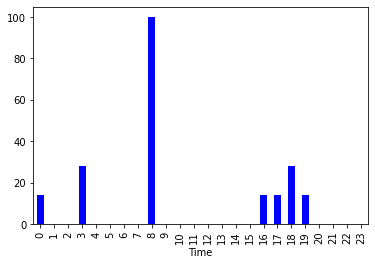

In [78]:
_=show_domain_stats('stackoverflow', 'blue')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

### answer here

In [ ]:
1. work computer
2. No
3. coding websites 
4. More studious as most of the websites are educational websites.
